<a href="https://colab.research.google.com/github/alvaro-salgado/AA_MCD/blob/main/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 6

Aprendizaje supervisado

In [26]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [45]:
# Cargar el dataset
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

In [46]:
# Mapear etiquetas de actividad de inglés a español
activity_labels = {
    "WALKING": "Caminar",
    "WALKING_UPSTAIRS": "Subiendo escaleras",
    "WALKING_DOWNSTAIRS": "Bajando escaleras",
    "SITTING": "Sentado",
    "STANDING": "De pie",
    "LAYING": "Acostado"
}

# Ver las etiquetas originales únicas
original_labels = data['Activity'].unique()
print("Etiquetas originales:", original_labels)

# Traducir las etiquetas de la columna 'Activity'
data['Activity'] = data['Activity'].map(activity_labels)

# Verificar la traducción
translated_labels = data['Activity'].unique()
print("Etiquetas traducidas:", translated_labels)

Etiquetas originales: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
Etiquetas traducidas: ['De pie' 'Sentado' 'Acostado' 'Caminar' 'Bajando escaleras'
 'Subiendo escaleras']


In [47]:
# Convertir la columna 'Activity' en etiquetas numéricas
label_encoder = LabelEncoder()
data['Activity'] = label_encoder.fit_transform(data['Activity'])

# Separar características y etiquetas
X = data.drop(['Activity', 'subject'], axis=1)
y = data['Activity']

In [48]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Normalizar los datos (opcional pero recomendado para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Crear un clasificador SVM
svm_classifier = SVC(kernel='linear', random_state=42)

In [51]:
# Entrenar el clasificador SVM
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [52]:
# Predecir con el conjunto de prueba
y_pred = svm_classifier.predict(X_test_scaled)

In [53]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo SVM: {accuracy:.2f}')

Precisión del modelo SVM: 0.98


In [54]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

In [55]:
# Imprimir un reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.99      1.00      0.99       206
           2       1.00      0.99      0.99       247
           3       0.97      0.96      0.96       276
           4       0.95      0.97      0.96       262
           5       0.99      0.99      0.99       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



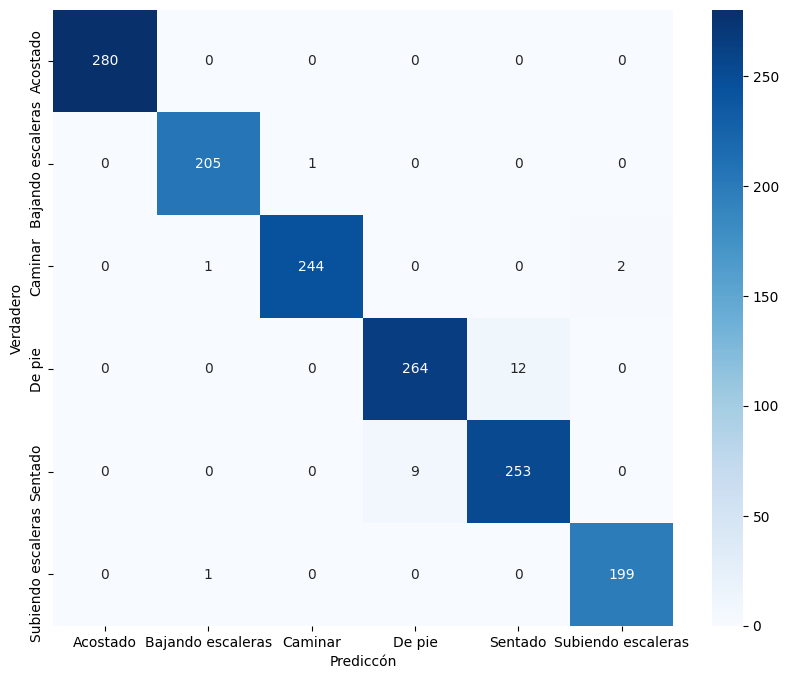

In [56]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediccón')
plt.ylabel('Verdadero')
plt.show()